# Rodrigo Burberg 
# Computer Vision - Project 7 AIML 


Context:

Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages


Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [1]:

# Import necessary libraries

import numpy as np                               # Import numpy
from skimage import data, io                     # Import skimage library (data - Test images and example data.
import seaborn as sns                                   
import pandas as pd                                                #                          io - Reading, saving, and displaying images.) 
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)
import cv2
import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow      # To show images using cv2 module
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping                                                       # Dense: Just your regular densely-connected NN layer.
from glob import glob
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn import svm
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# Mount Google drive so dataset can be accessed (The dataset file (monkeys_dataset.zip) is inside google drive.)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# load in data
data = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')

In [4]:
#number of classes 

labels.nunique

<bound method DataFrame.nunique of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

In [5]:
labels.shape

(4750, 1)

In [6]:
labels.value_counts



<bound method DataFrame.value_counts of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

In [7]:
data.shape

#data contains 4750 128x128 color images 

(4750, 128, 128, 3)

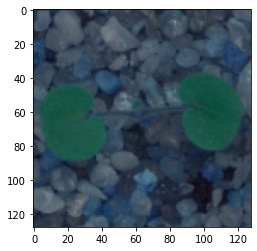

In [8]:
# displays first picture of "images file"

plt.imshow(data[0])

In [9]:
#prints shape of image 

print('The shape of image is: ', data[0].shape)
# Extracting the height and width of an image 
h, w = data[0].shape[:2] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (128, 128, 3)
Height = 128,  Width = 128


# Image as multidimensional array:


In [10]:
#prints image matrix 

print('Image Matrix: \n', data)
print(type(data))

Image Matrix: 
 [[[[ 35  52  78]
   [ 36  49  76]
   [ 31  45  69]
   ...
   [ 78  95 114]
   [ 76  93 110]
   [ 80  95 109]]

  [[ 33  46  68]
   [ 37  50  73]
   [ 48  65  83]
   ...
   [ 81  96 113]
   [ 74  89 105]
   [ 83  95 109]]

  [[ 34  50  68]
   [ 35  52  72]
   [ 70  85 101]
   ...
   [ 83  97 112]
   [ 79  94 108]
   [ 79  94 107]]

  ...

  [[ 35  50  69]
   [ 42  57  73]
   [ 42  57  72]
   ...
   [ 60  76  92]
   [ 67  81  97]
   [ 64  77  95]]

  [[ 36  52  67]
   [ 48  63  78]
   [ 41  57  73]
   ...
   [ 44  66  83]
   [ 58  76  91]
   [ 57  74  90]]

  [[ 44  58  70]
   [ 43  57  73]
   [ 40  55  72]
   ...
   [ 41  70  92]
   [ 55  78  97]
   [ 61  79  96]]]


 [[[ 30  47  63]
   [ 30  50  60]
   [ 34  47  63]
   ...
   [ 48  59  74]
   [ 42  54  69]
   [ 44  56  70]]

  [[ 30  49  67]
   [ 26  47  60]
   [ 30  40  61]
   ...
   [ 50  64  76]
   [ 52  67  78]
   [ 45  56  72]]

  [[ 23  46  65]
   [ 27  48  64]
   [ 25  40  59]
   ...
   [ 39  59  81]
   [ 47  62 

In [11]:
# Data Preprocessing 

In [12]:
#gaussian blurring 

data_blurred = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5,5), 0), 
    1,
   data
   )



In [13]:
data_blurred = data_blurred.reshape(-1,128,128,3)

data_blurred.shape



(4750, 128, 128, 3)

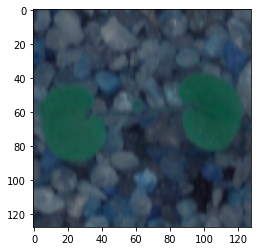

In [14]:
# Prints Guassian blurred image 

plt.imshow(data_blurred[0])

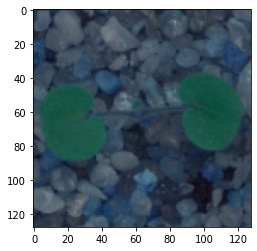

In [15]:
# Prints original image 

plt.imshow(data[0])

In [16]:
# Normalize the data
# Dividing an image by 255 simply rescales the image from 0-255 to 0-1.

data_complete = data_blurred.astype('float32') / 255.0

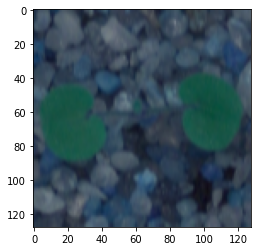

In [17]:
# Prints image after it has been blurred and normalized to reduce noise 

plt.imshow(data_complete[0])

**Make data compatible:**

a. Convert labels to one-hot-vectors.

b. Print the label for y_train[0].

c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)

d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [18]:
# a. Convert labels to one-hot-vectors 

In [19]:
#image is already in a numpy array; we need to convert the labels into a numpy array
X = data_complete
y = labels.values

In [20]:
# Split data into test and train to build the model.
# train size of .7 
# test size of .3 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [21]:
#further split data into test and validation 
# test size of .5 
# validation size of .5

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [22]:
#labels dictionary 

label_dict =  {0:'Small-flowered Cranesbill', 1:'Fat Hen', 2:'Shepherds Purse', 3:'Common wheat', 4:'Common Chickweed', 5:'Charlock', 6:'Cleavers', 7:'Scentless Mayweed', 8:'Sugar beet', 9:'Maize', 10: 'Black-grass', 11: 'Loose Silky-bent'}

In [23]:
# confirming datatyoe 

type(X_train)

numpy.ndarray

In [24]:
# Print the shape of dataset.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

X_train shape: (3325, 128, 128, 3)
3325 train samples
712 test samples
713 validation samples


In [25]:
y_train.shape

(3325, 1)

* training set has 3325 images 
* 128 by 128 pixels 
* Each image has 3 color channels 

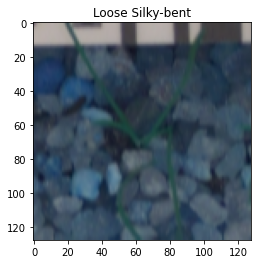

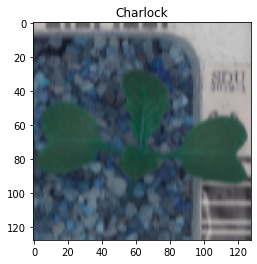

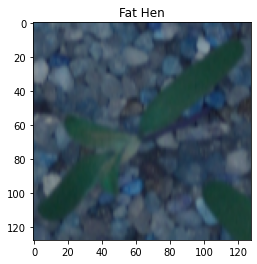

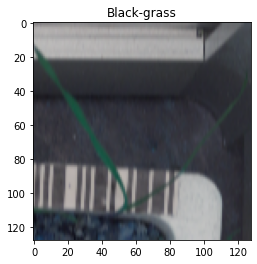

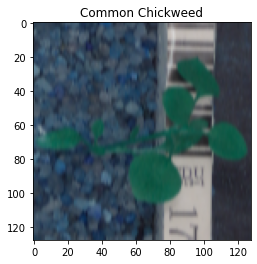

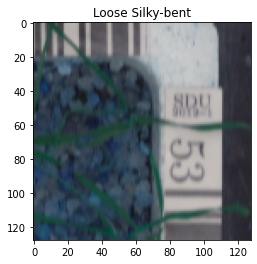

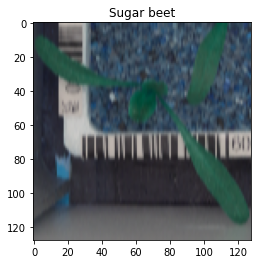

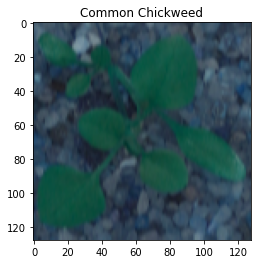

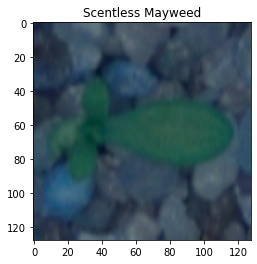

<Figure size 432x288 with 0 Axes>

In [26]:
# This prints out 10 images and their corresponding labels from the train set 

for i in range(10):
  image = X_train[i]
  label = y_train[i][0]
  plt.imshow(image)
  plt.title(label)
  plt.figure(i);

In [27]:
# Convert labels to one hot vectors.

enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)
y_valid = enc.fit_transform(y_valid)

In [28]:
#checking size of arrays 

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(3325, 12)
(712, 12)
(713, 12)


In [29]:
y_train[5]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])


4. Building CNN: (15 Marks)

a. Define layers.

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [30]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = X_train.shape[1:], activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

In [31]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

In [33]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 12
epochs = 40


In [34]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)



Epoch 1/40
104/104 [==============================] - 34s 25ms/step - loss: 2.1230 - accuracy: 0.2620 - val_loss: 1.6429 - val_accuracy: 0.4003
Epoch 2/40
104/104 [==============================] - 2s 19ms/step - loss: 1.6031 - accuracy: 0.4214 - val_loss: 1.4596 - val_accuracy: 0.5014
Epoch 3/40
104/104 [==============================] - 2s 19ms/step - loss: 1.4037 - accuracy: 0.5128 - val_loss: 1.2935 - val_accuracy: 0.5365
Epoch 4/40
104/104 [==============================] - 2s 19ms/step - loss: 1.1770 - accuracy: 0.5889 - val_loss: 1.1415 - val_accuracy: 0.6124
Epoch 5/40
104/104 [==============================] - 2s 19ms/step - loss: 1.0152 - accuracy: 0.6502 - val_loss: 1.0106 - val_accuracy: 0.6587
Epoch 6/40
104/104 [==============================] - 2s 19ms/step - loss: 0.8338 - accuracy: 0.7044 - val_loss: 0.9040 - val_accuracy: 0.7065
Epoch 7/40
104/104 [==============================] - 2s 19ms/step - loss: 0.6864 - accuracy: 0.7570 - val_loss: 0.7797 - val_accuracy: 0.747

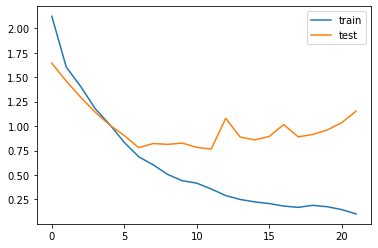

In [35]:
history = classifier.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
# Score trained model
scores = classifier.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 7ms/step - loss: 1.1537 - accuracy: 0.7626
Test loss: 1.1536586284637451
Test accuracy: 0.7626404762268066


* The model performs relatively well with a training accuracy of .966 test accuracy of .762
* To get the model to perform even better we can tune the hyperparameters until better results are achieved. This will mostly be done in a trial and error sequence.  
* Another recommendation get better results is in the images themselves; some images contain barcodes and other things that might affect the classification model. Having quailty images will train the model better giving us better results. 

In [40]:
# this prints out the confusion matrix 

y_pred=classifier.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0  0  0  1  1 16  0  0  1  0  0]
 [ 0 48  0  0  0  0  0  0  0  1  0  1]
 [ 0  3 39  1  1  1  0  2  1  0  2  1]
 [ 0  0  0 89  0  2  0  0  2  2  0  0]
 [ 7  0  1  0 18  3  3  0  3  0  0  0]
 [ 0  1  1  4  5 62  0  0  2  0  2  8]
 [25  0  0  0  0  3 65  0  0  0  2  1]
 [ 0  1  0  0  0  0  0 19  1  0  0  5]
 [ 1  5  1  1  1  1  1  2 55  4  1  4]
 [ 0  4  0  4  0  1  0  0  2 25  4  0]
 [ 0  2  0  0  0  0  0  1  0  0 56  1]
 [ 0  0  1  1  0  1  1  1  4  1  1 49]]


Predicted label: Loose Silky-bent
Softmax Outputs: [[4.5779636e-08 5.6346348e-11 2.7055314e-13 2.4612255e-02 2.1800398e-12
  1.1166573e-10 2.0696429e-11 2.1976193e-07 1.8063910e-01 6.5395617e-10
  2.9120192e-11 7.9474837e-01]]
1.0


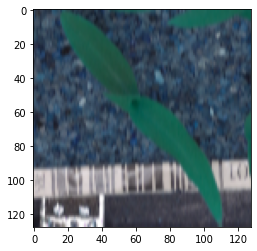

In [41]:
#prints x_test[2]

plt.imshow(X_test[2].reshape(128, 128,3))
y_pred_new = classifier.predict(X_test[2].reshape(1, 128, 128, 3))
print("Predicted label:", label_dict[y_pred_new.argmax()])
print("Softmax Outputs:", y_pred_new)
print(y_pred_new.sum())

Predicted label: Black-grass
Softmax Outputs: [[9.7984900e-19 2.2888452e-10 3.0676033e-09 1.8659861e-17 1.1910445e-24
  7.9375881e-15 1.1333753e-19 1.2753400e-13 7.9562946e-22 5.6538194e-13
  1.0000000e+00 4.2202637e-11]]
1.0


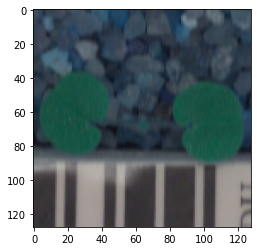

In [50]:
# prints x_test[3]

plt.imshow(X_test[3].reshape(128, 128,3))
y_pred_new = classifier.predict(X_test[3].reshape(1, 128, 128, 3))
print("Predicted label:", label_dict[y_pred_new.argmax()])
print("Softmax Outputs:", y_pred_new)
print(y_pred_new.sum())

Predicted label: Common wheat
Softmax Outputs: [[2.7737324e-05 2.7507128e-06 6.1657211e-08 8.7044173e-01 1.4013025e-05
  2.0895750e-04 5.6647498e-04 3.3018962e-04 9.5318839e-02 1.2317528e-02
  1.4998860e-04 2.0621695e-02]]
1.0


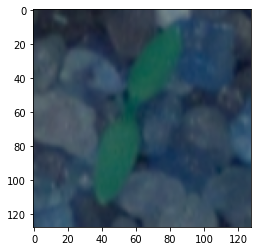

In [49]:
# prints x_test[33]

plt.imshow(X_test[33].reshape(128, 128,3))
y_pred_new = classifier.predict(X_test[33].reshape(1, 128, 128, 3))
print("Predicted label:", label_dict[y_pred_new.argmax()])
print("Softmax Outputs:", y_pred_new)
print(y_pred_new.sum())

Predicted label: Loose Silky-bent
Softmax Outputs: [[3.4341901e-06 1.8552717e-09 2.9315858e-08 7.8520499e-04 3.3887804e-07
  2.6257017e-01 3.4733544e-05 1.0940709e-05 1.3242091e-06 3.9294839e-05
  9.3598246e-06 7.3654509e-01]]
0.9999999


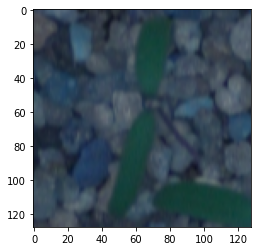

In [48]:
# prints x_test[36]

plt.imshow(X_test[36].reshape(128, 128,3))
y_pred_new = classifier.predict(X_test[36].reshape(1, 128, 128, 3))
print("Predicted label:", label_dict[y_pred_new.argmax()])
print("Softmax Outputs:", y_pred_new)
print(y_pred_new.sum())

Predicted label: Loose Silky-bent
Softmax Outputs: [[2.1005309e-08 2.6187885e-01 2.7842697e-08 1.9641677e-06 4.2415459e-12
  4.3357925e-08 7.2078293e-10 8.7417815e-05 3.0623728e-06 1.6633065e-05
  5.3932704e-04 7.3747259e-01]]
1.0


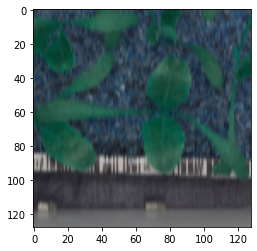

In [47]:
# prints x_test[59]

plt.imshow(X_test[59].reshape(128, 128,3))
y_pred_new = classifier.predict(X_test[59].reshape(1, 128, 128, 3))
print("Predicted label:", label_dict[y_pred_new.argmax()])
print("Softmax Outputs:", y_pred_new)
print(y_pred_new.sum())

* The model performs relatively well with a training accuracy of .966 test accuracy of .762
* To get the model to perform even better we can tune the hyperparameters until better results are achieved. This will mostly be done in a trial and error basis.  
* Another recommendation get better results is in the images themselves; some images contain barcodes and different kinds of plants in the same image. These things will affect the classification model. Having quailty images will train the model better giving us better results. 